In [1]:
import scipy.linalg
import numpy as np
import matplotlib.pyplot as plt
import time

n = 50
time = 0.09032893180847168


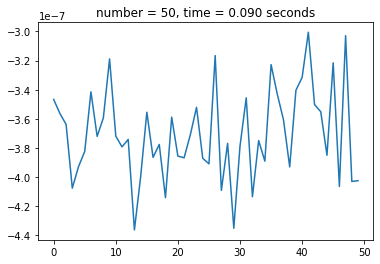

n = 100
time = 0.2049858570098877


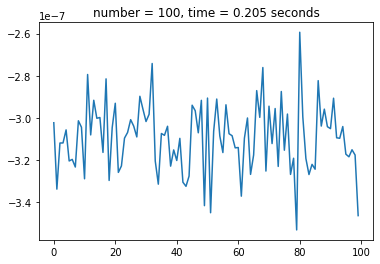

n = 150
time = 0.49114108085632324


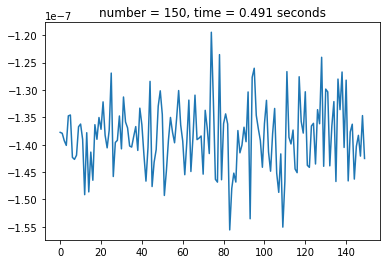

n = 200
time = 0.7805604934692383


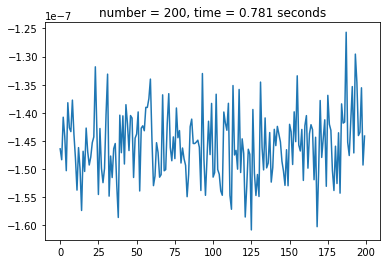

n = 250
time = 1.0529625415802002


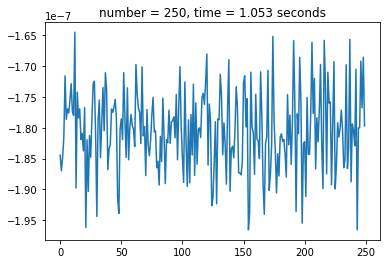

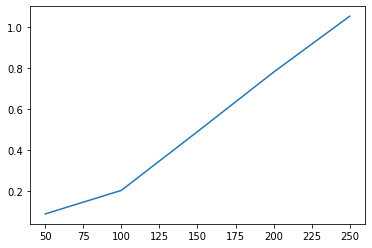

In [2]:
eps = 0.00001
def dif(x, xnew):
    s = 0
    for i in range(n):
        s += (xnew[i] - x[i]) ** 2
    s = s ** 0.5
    return s
    
def jacobi(A, f, x):
    xnw = [0] * n
    for i in range(n):
        s = 0
        for j in range(i):
            s = s + A[i][j] * x[j]
        for j in range(i + 1, n):
            s = s + A[i][j] * x[j]            
        xnw[i] = (f[i] - s) / A[i][i]
    return xnw

def solve(A, f):
    xnew = np.random.uniform(0, n, n)
    while True:
        x = xnew
        xnew = jacobi(A, f, x)
        if dif(x, xnew) <= eps:
            break
    return xnew

qTime = 0.0
n = 0
nList = []
qTimeList = []
while qTime <= 1.0:
    n += 50
    nList.append(n)
    A = np.random.uniform(0, n, (n, n))
    for i in range(n):
        A[i][i] = A[i][i] + n * n;
    f = np.random.uniform(0, n, n)
#    print(A)
#    print(f)
#    print(time.time() - startTime)
    Y1 = np.linalg.solve(A, f)
    startTime = time.time()
    Y2 = solve(A, f)
    qTime = time.time() - startTime
    qTimeList.append(qTime)
    print(f"n = {n}")
    print(f"time = {qTime}")
    fig, ax = plt.subplots()
    ax.plot(Y2 - Y1)
    plt.title(f"number = {n}, time = {qTime:0.3f} seconds")
    plt.show()
    fig.savefig(f"Jacobi_graphics/{n:3d}x{n:3d}.png")
fig, ax = plt.subplots()
ax.plot(nList, qTimeList)
plt.show()
fig.savefig("Jacobi_time_dependes_of_quantity.png")
#plt.plot(Y2 - Y1)
#    plt.show()
#plt.plot(qTimeList, nList)
#plt.show()